# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Franco, Andrea Rose\
_Student No._: 2021 - 06793\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** ANDREA ROSE V. FRANCO

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



# **CREATING SYNTHETIC IMAGES**

In this module, we mathematically created synthetic images. We plot a sinusoid with frequencies of 1, 3, and 5 cycles/cm by generating a sine wave ranging from -1 to 1 is created with 400 data points.

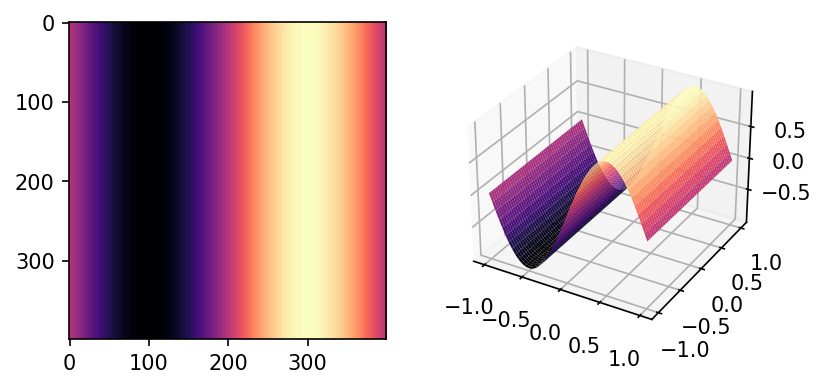

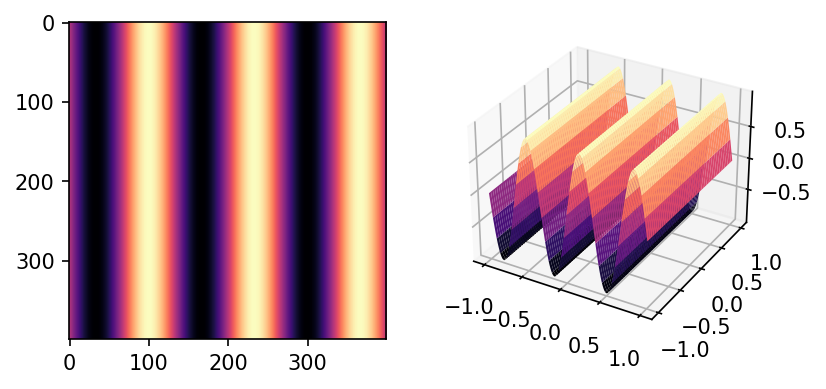

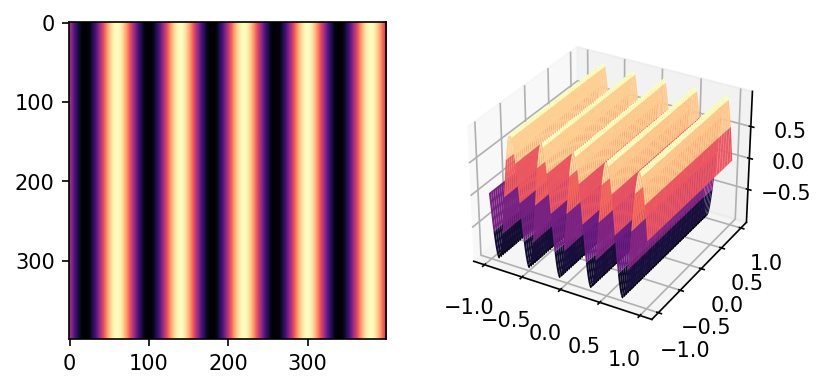

In [85]:
#Creating a meshgrid
N = 400 #resolution
xx = np.linspace(-1, 1, N)
X, Y = np.meshgrid(xx, xx)

cmap = 'magma'

#Frequencies
freq = [1, 3, 5]

for i, f in enumerate(freq):
  R = np.sin(f*X*np.pi) #sine wave

  #Plotting
  fig = plt.figure(figsize=(6, 3), dpi=150)
  plt.subplot(121)
  plt.imshow(R, cmap = cmap)

  ax = fig.add_subplot(122, projection = '3d')
  ax.plot_surface(X, Y, R, cmap = cmap)

We can see that the sine waves varies as the frequency increases. Creating synthetic images is commonly used in optics to analyze patterns. Through different frequencies, we can see its effect on the wave behavior. This is crucial for understanding optical phenomena such as interference fringes and phase shift profilometry techniques.

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

# **COLOR IMAGES**

The trichromatic theory of color vision allows us to create colored images using only the three colors: red, green, blue. Young and Helmholtz suggested that the photoreceptors of the eye were either sensitive to short-wavelength (blue), medium-wavelength (green), or long-wavelength (red). With that, these colors can be overlayed and mixed at different proportions to produce a certain color in the visible spectrum.

Source: https://www.verywellmind.com/what-is-the-trichromatic-theory-of-color-vision-2795831


# **OLYMPICS LOGO**

To recreate the olympics logo, we utilize the concept of the trichromatic theory by first initializing the RGB channels using white color (1, 1, 1). That is, we use np.ones and generate an array with size NxN.

We then define the charactertics of the five olympic rings by setting the ring thickness and their radii. The center of the rings were created manually through trial and error.

To create colors, we utilize color subtraction, that is removing colors from the white background that we oriignally initialized. In setting the colors of the rings, we want to set it using the opposite RGB value since we will be subtracting the color from white and not adding it. What do I mean by that? If we want the ring to be color black, we set its RGB value to be (1, 1, 1) instead of (0, 0, 0) so that when we subtract it from the initial RGB color channels, we get (1, 1, 1) - (1, 1, 1) = (0, 0, 0) which is color black!

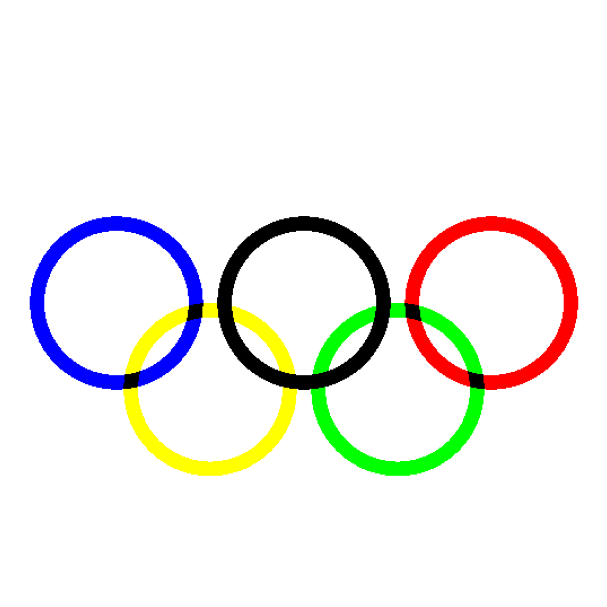

In [9]:
#Create a meshgrid
N = 512
x, y = np.linspace(-20, 20, num=N), np.linspace(-20, 20, num=N)
X, Y = np.meshgrid(x, y)

#Initialize arrays for RGB color channels with white
Rd, Gn, Bl = np.ones((N, N)), np.ones((N, N)), np.ones((N, N))

#Charactertistics of olympic rings
Rc = 1  #Ring thickness
R = 5.5  #Radii

#Define center of the rings
centers = [(0, 0), (-13, 0), (13, 0), (-6.5, 6), (6.5, 6)]

#Set colors of the rings (black, blue, red, yellow, and green)
colors = [(1, 1, 1), (1, 1, 0), (0, 1, 1), (0, 0, 1), (1, 0, 1)] #Opposite because we will be subtracting from white

#Mask each ring and apply the desired color
for i in range(5):
    xt, yt = centers[i]
    color = colors[i]

    #Calculate the distance from each point to the center of the current circle
    R_dist = np.sqrt((X - xt) ** 2 + (Y - yt) ** 2)

    #Create a mask for the current ring
    mask = np.logical_and(R_dist > R - Rc / 2, R_dist < R + Rc / 2)

    #Subtract color to the appropriate channel
    Rd[mask] -= color[0]
    Gn[mask] -= color[1]
    Bl[mask] -= color[2]

#Create a 3D array to represent the RGB image
I_rgb = np.stack((Rd, Gn, Bl), axis=-1)

#Plot the Olympic rings
plt.figure(figsize=(10, 5), dpi=150)
plt.grid(linestyle='--', linewidth=0.5)
plt.imshow(I_rgb)
plt.axis('off')
plt.show()

As we can see, black regions appear when the colored rings overlap. This is because multiple colors interact and with each other, and thus their intensities decreases due to the color subtraction, eventually leading to a darker appearance.

# **PHILIPPINE SEA GAMES LOGO**

Aside from the olympics logo, we can also recreate the Philippine sea games logo using the same process mentioned above. The center of the rings were adjusted manually through trial and error.

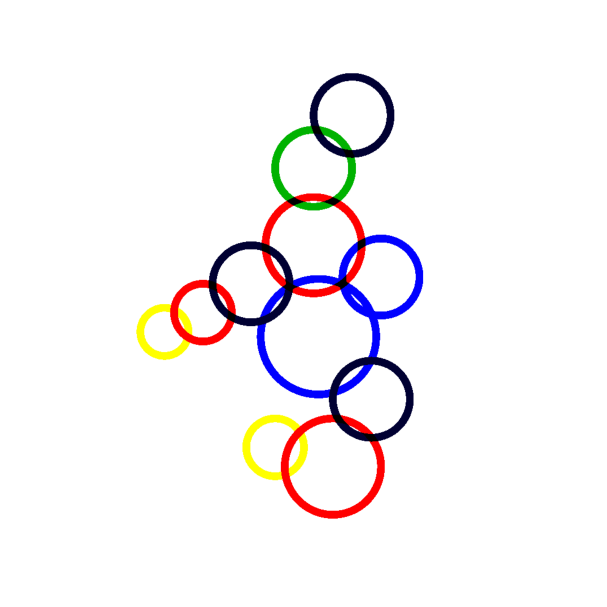

In [10]:
#Create a meshgrid
N = 1024
x, y = np.linspace(-30, 30, num=N), np.linspace(-30, 30, num=N)
X, Y = np.meshgrid(x, y)

#Initialize arrays for RGB color channels with white
Rd, Gn, Bl = np.ones((N, N)), np.ones((N, N)), np.ones((N, N))

#Characteristics of the Sea Games rings
Rc = 0.8  # Ring thickness
radii = [4, 4, 5, 4, 4, 3, 2.5, 6, 4, 5, 3]  # Radii

#Define center of the rings
centers = [(8, -14.5), (4, -9), (4, -1), (11, 2.3), (-2.5, 3), (-7.5, 6), (-11.5, 8), (4.5, 8.5), (10, 15), (6, 22), (0, 20)]

#To center everything in the plot
center_shift = (8 - np.max([x[0] for x in centers]), 17 - np.max([y[1] for y in centers]))
centers_shifted = [(x + center_shift[0], y + center_shift[1]) for x, y in centers]

#Dark Blue, Green, Red, Blue, Dark Blue, Red, Yellow, Blue, Dark Blue, Red, Yellow
colors = [(1, 1, 0.8), (1, 0.3, 1), (0, 1, 1), (1, 1, 0), (1, 1, 0.8), (0, 1, 1), (0, 0, 1), (1, 1, 0), (1, 1, 0.8), (0, 1, 1), (0, 0, 1)]  # Opposite because we will be subtracting from white

#Mask each ring and apply the desired color
for i in range(len(centers)):
    xt, yt = centers_shifted[i]
    color = colors[i]
    R = radii[i]

    #Calculate the distance from each point to the center of the current circle
    R_dist = np.sqrt((X - xt) ** 2 + (Y - yt) ** 2)

    #Create a mask for the current ring
    mask = np.logical_and(R_dist > R - Rc / 2, R_dist < R + Rc / 2)

    #Subtract color to the appropriate channel
    Rd[mask] -= color[0]
    Gn[mask] -= color[1]
    Bl[mask] -= color[2]

#Create a 3D array to represent the RGB image
I_rgb = np.stack((Rd, Gn, Bl), axis=-1)

#Plot the Sea Games rings
plt.figure(figsize=(8, 5), dpi=150)
plt.grid(linestyle='--', linewidth=0.5)
plt.imshow(I_rgb)
plt.axis('off')
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

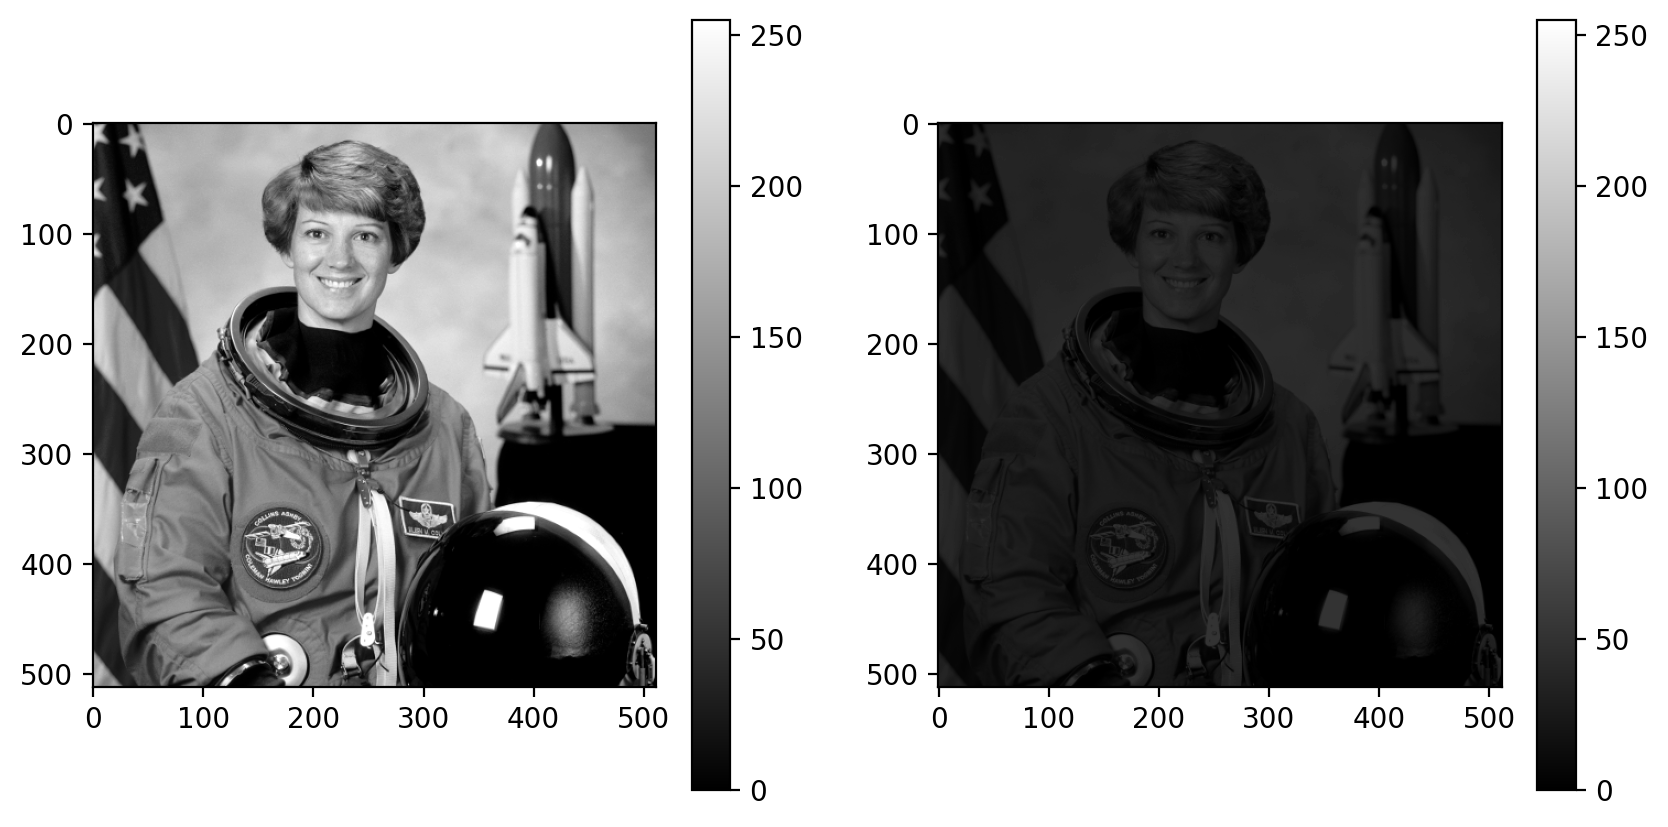

In [11]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

# **CONTRAST STRETCHING**

Contrast stretching stretches the range of intensity values in an image to the possible minimum and maximum values.

Before stretching, we need to determine the maximum and minimum intensity value of an image. The general formula for contrast stretching is:

$s = (r - r_{min})\frac{I_{max} - I_{min}}{r_{max} - r_{min}} + I_{min}$

where $r$ is the image, $r_{min}$ is the minimum intensity value of the image, $r_{max}$ is the maximum intensity value of the image, $I_{min}$ is the possible minimum value, and $I_{max}$ is the possible maximum value.

For a standard 8-bit grayscale image, the possible minimum and maximum values is 0 and 255, respectively. Thus, applying this formula to our image we use:

$s = (r - r_{min})\frac{255 - 0}{r_{max} - r_{min}} + 0$

$s = (r - r_{min})\frac{255}{r_{max} - r_{min}} $

This formula was obtained from: https://samirkhanal35.medium.com/contrast-stretching-f25e7c4e8e33




In [12]:
#Low contrast image
r = img_low_contrast

#Getting the minimum and maximum pixel value
rmin = np.min(img_low_contrast)
rmax = np.max(img_low_contrast)

#Contrast stretching using the formula for a standard 8-bit grayscale image
img_stretched_contrast =(r - rmin)*255/(rmax - rmin)

Plotting the original low contrast image and the stretched contrast to see the difference

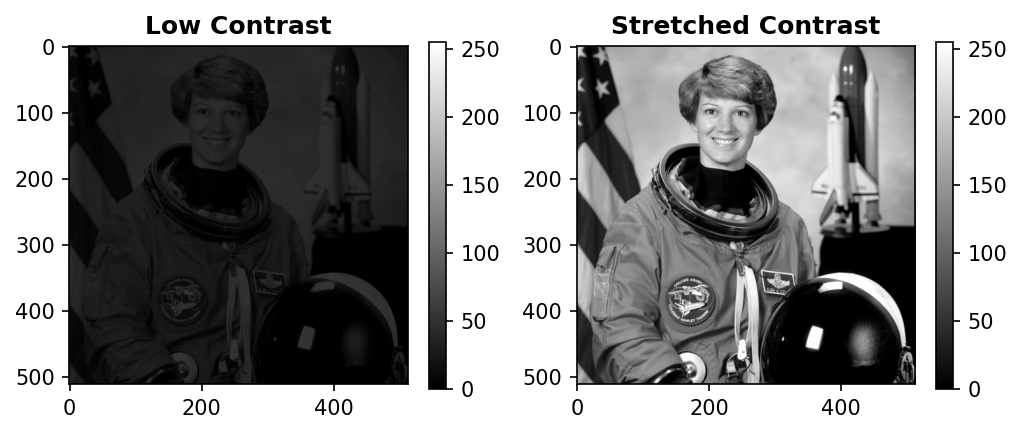

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=150)

#Plot Original and Contrast Stretched Images
orig = ax[0].imshow(img_low_contrast, cmap='gray', vmax = 255)
ax[0].set_title('Low Contrast', weight = 'bold')
cs = ax[1].imshow(img_stretched_contrast, cmap = 'gray', vmax = 255)
ax[1].set_title('Stretched Contrast', weight = 'bold')
fig.colorbar(orig, shrink = 0.75)
fig.colorbar(cs, shrink = 0.75)

We can observe above that the contrast stretched image is better visually. In a low contrast image, specific details are difficult to distinguish because the pixel values of the image mostly have the same intensity values. In a contrast stretched image, we can observe more details and the boundaries are much more defined.


# **IMAGE HISTOGRAM**

The histogram of an image is a gray-scale value distribution that shows the frequency of occurrence of each gray-level value in an image. It can be visualized through the probability distribution function and cumulative distribution function.

The probability function is defined by the equation:

$P(r_k) = \frac{n_k}{n}$

 **Probability Distribution Function and Cumulative Distribution Function**

 Since we have a low contrast image and contrast stretched image, we can visualize their gray-scale value distribution by plotting the PDF and CDF.


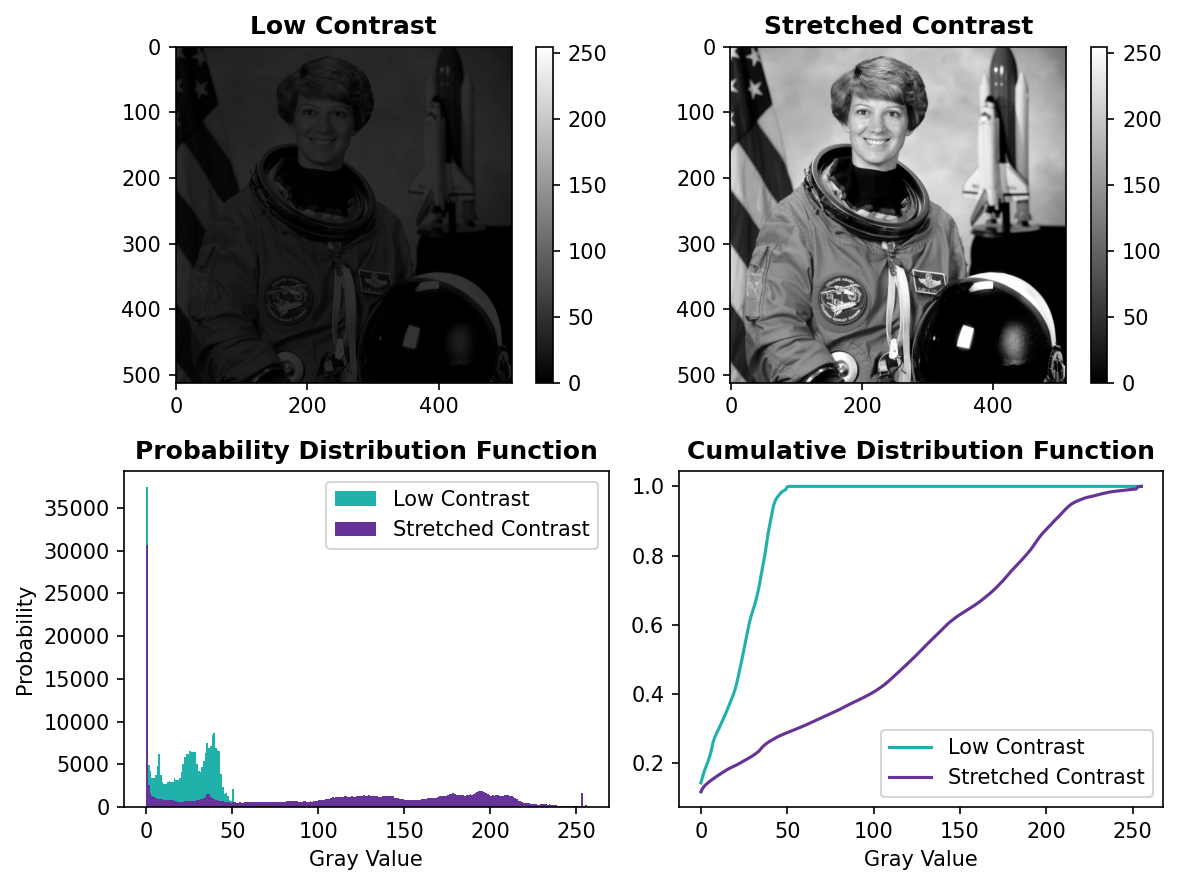

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), dpi=150)

orig = ax[0, 0].imshow(img_low_contrast, cmap='gray', vmax = 255)
ax[0, 0].set_title('Low Contrast', weight = 'bold')
cs = ax[0,1].imshow(img_stretched_contrast, cmap = 'gray', vmax = 255)
ax[0,1].set_title('Stretched Contrast', weight = 'bold')
fig.colorbar(orig)
fig.colorbar(cs)

#Plot PDFs
ax[1, 0].hist(img_low_contrast.flatten(), 256, [0, 256], color='lightseagreen', label = 'Low Contrast')
ax[1, 0].hist(img_stretched_contrast.flatten(), 256, [0, 256], color='rebeccapurple', label = 'Stretched Contrast')
ax[1, 0].set_title('Probability Distribution Function', weight = 'bold')
ax[1, 0].set_xlabel("Gray Value")
ax[1, 0].set_ylabel("Probability")
ax[1, 0].legend()

#Compute histogram and CDF of original image
hist, bins = np.histogram(img_low_contrast.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

#Compute histogram and CDF of histogram-manipulated image
hist_, bins_ = np.histogram(img_stretched_contrast.flatten(), 256, [0, 256])
cdf_ = hist_.cumsum()
cdf_normalized_ = cdf_ / cdf_.max()

#Plot CDFs
ax[1, 1].plot(cdf_normalized, color = 'lightseagreen', label = 'Low Contrast')
ax[1, 1].plot(cdf_normalized_, color = 'rebeccapurple', label = 'Stretched Contrast')
ax[1, 1].set_title('Cumulative Distribution Function', weight = 'bold')
ax[1, 1].set_xlabel("Gray Value")
ax[1, 1].legend()

plt.tight_layout()
plt.show()

In the plots above, we can see that the low contrast image only has limited pixel values from 0 to 50 while the contrast stretched image shows a widely distributed variation of pixels.

# **HISTOGRAM BACKPROJECTION/EQUALIZATION**

Histogram backprojection is an image segmentation technique, to find regions in an image that have similar color distribution.

In histogram backprojection, the gray values of an image is edited according to the desired CDF. We assign the gray values with a new value.

 To do this, we first define our desired CDF. In this code, we define both a linear and sigmoid function.


A sigmoid function is defined by the formula:
$\sigma = \frac{1}{1 + e^{-x}}$. The plot of this curve is S-shaped. It takes any input, and returns a value between 0 and 1.




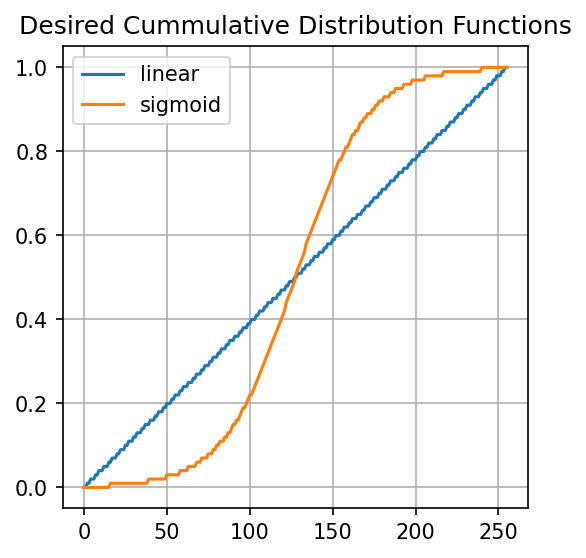

In [15]:
#Linear CDF
cdf_line = np.round(np.linspace(0, 1, 256), 2) #an array of evenly spaced numbers, rounded to 2 decimal places

#Sigmoid CDF
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

cdf_sig = np.round(sigmoid(np.linspace(-6, 6, 256)), 2)

#Plotting the linear and sigmoid CDF
plt.figure(dpi = 150, figsize = (4, 4))
plt.grid()
plt.title('Desired Cummulative Distribution Functions')
plt.plot(cdf_line, label = 'linear')
plt.plot(cdf_sig, label = 'sigmoid')
plt.legend()

The function below takes in the original `gray_value` of an image and gets its transformed value `T_r` by finding that value in the original CDF of the image. It then finds the index of the nearest value in the desired CDF to the rounded transformed value by using 'np.argmin` which returns the index of the minimum value. The new gray value is the nearest value.

In [16]:
def backprojection(gray_value, cdf_desired, cdf_normalized):
    #Get the transformed value from the normalized CDF
    T_r = cdf_normalized[gray_value]

    #Find the index of the nearest value in the desired CDF to the rounded transformed value
    nearest_index = np.argmin(np.abs(cdf_desired - np.round(T_r, 2)))

    #New gray value is the nearest value
    new_gray_value = nearest_index

    return new_gray_value

We now import the image we want to use backprojection on.

In [17]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [18]:
import cv2

(-0.5, 4031.5, 3023.5, -0.5)

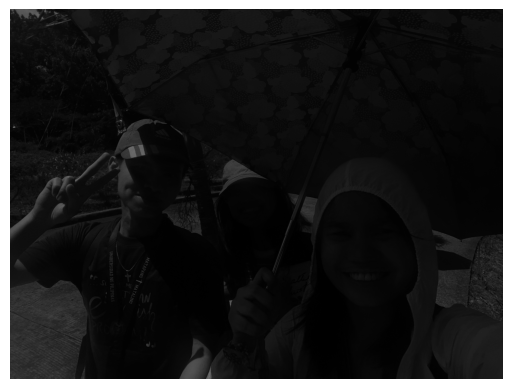

In [19]:
#Import image and convert to grayscale
file_path = "/content/drive/My Drive/SY 2023-2024/AP157/"
img = cv2.imread(file_path + 'image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')
plt.axis('off')

This is an image taken on our way to the App Phy 157 lab class at the CSRC. We are walking in the intense heat, so might as well immortalize it and make it memorable.

We now initialize a backprojection image and apply backprojection process to each pixel in the image:

**LINEAR CDF**

In [20]:
#Initialize back-projection image
hbj_line = np.zeros_like(gray)

#Compute histogram and CDF of original image
hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

#Apply backprojection to each pixel value
for i in range(np.shape(hbj_line)[0]):
  for j in range(np.shape(hbj_line)[1]):
    gray_value = gray[i][j]
    hbj_line[i][j] = backprojection(gray_value, cdf_line, cdf_normalized)

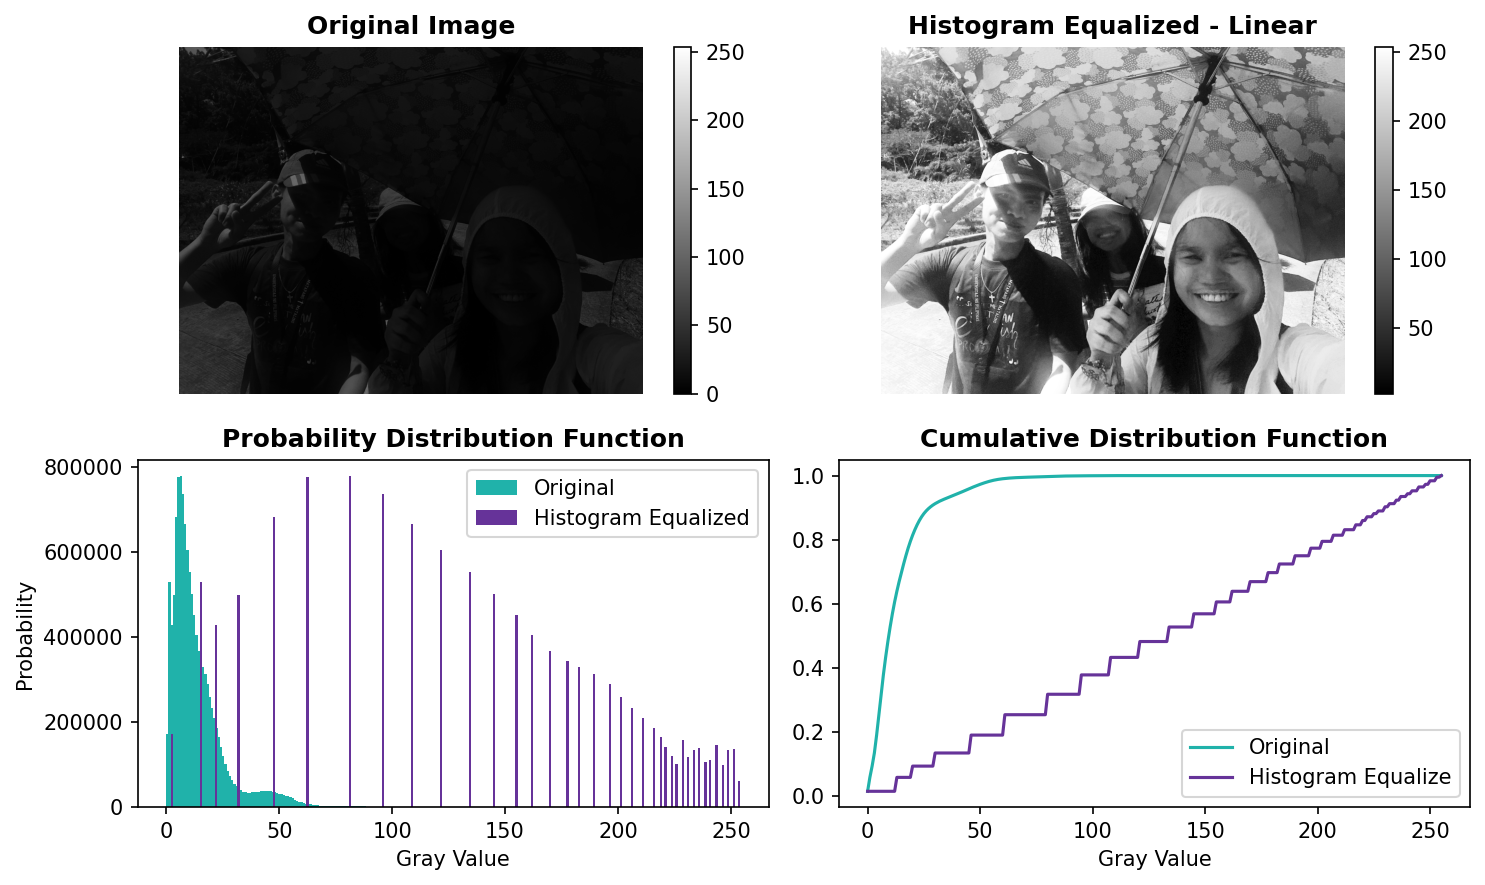

In [21]:
#Plotting
fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi=150)

orig = ax[0, 0].imshow(gray, cmap='gray')
ax[0, 0].set_title('Original Image', weight = 'bold')
ax[0,0].axis('off')
cs = ax[0,1].imshow(hbj_line, cmap = 'gray')
ax[0,1].set_title('Histogram Equalized - Linear', weight = 'bold')
ax[0,1].axis('off')
fig.colorbar(orig)
fig.colorbar(cs)

#Plot PDFs
ax[1, 0].hist(gray.flatten(), 256, color='lightseagreen', label = 'Original')
ax[1, 0].hist(hbj_line.flatten(), 256, color='rebeccapurple', label = 'Histogram Equalized')
ax[1, 0].set_title('Probability Distribution Function', weight = 'bold')
ax[1, 0].set_xlabel("Gray Value")
ax[1, 0].set_ylabel("Probability")
ax[1, 0].legend()

#Compute histogram and CDF of histogram-manipulated image
hist_, bins_ = np.histogram(hbj_line.flatten(), 256)
cdf_ = hist_.cumsum()
cdf_normalized_ = cdf_ / cdf_.max()

#Plot CDFs
ax[1, 1].plot(cdf_normalized, color = 'lightseagreen', label = 'Original')
ax[1, 1].plot(cdf_normalized_, color = 'rebeccapurple', label = 'Histogram Equalize')
ax[1, 1].set_title('Cumulative Distribution Function', weight = 'bold')
ax[1, 1].set_xlabel("Gray Value")
ax[1, 1].legend()

plt.tight_layout()
plt.show()

We can see from the results above that the image became clearer. When applying histogram equalization with a linear CDF, the pixel values are transformed such that it becomes linear. This transformation spreads out the intensity values more uniformly across the entire histogram range. From only having a range of 0 to 50 gray value in the PDF, the histogram PDF became more distributed.

Each point on this histogram equalized line represents a specific gray value and its corresponding probability. For example, if a gray value of 30 originally had a probability of 0.8, after histogram equalization, its intensity value will be adjusted to a new value that corresponds to the 80th percentile of the intensity distribution. The slight variations or steps in the histogram equalized line may occur due to the discrete nature of pixel values and the variations in intensity levels across the image.

 **SIGMOID CDF**

 For the sigmoid CDF, we utilize the same code as above, except that we change the desired function to `cdf_sig`

In [22]:
#Initialize back-projection image
hbj_sig = np.zeros_like(gray)

#Compute histogram and CDF of original image
hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

#Apply backprojection to each pixel value
for i in range(np.shape(hbj_sig)[0]):
  for j in range(np.shape(hbj_sig)[1]):
    gray_value = gray[i][j]
    hbj_sig[i][j] = backprojection(gray_value, cdf_sig, cdf_normalized)

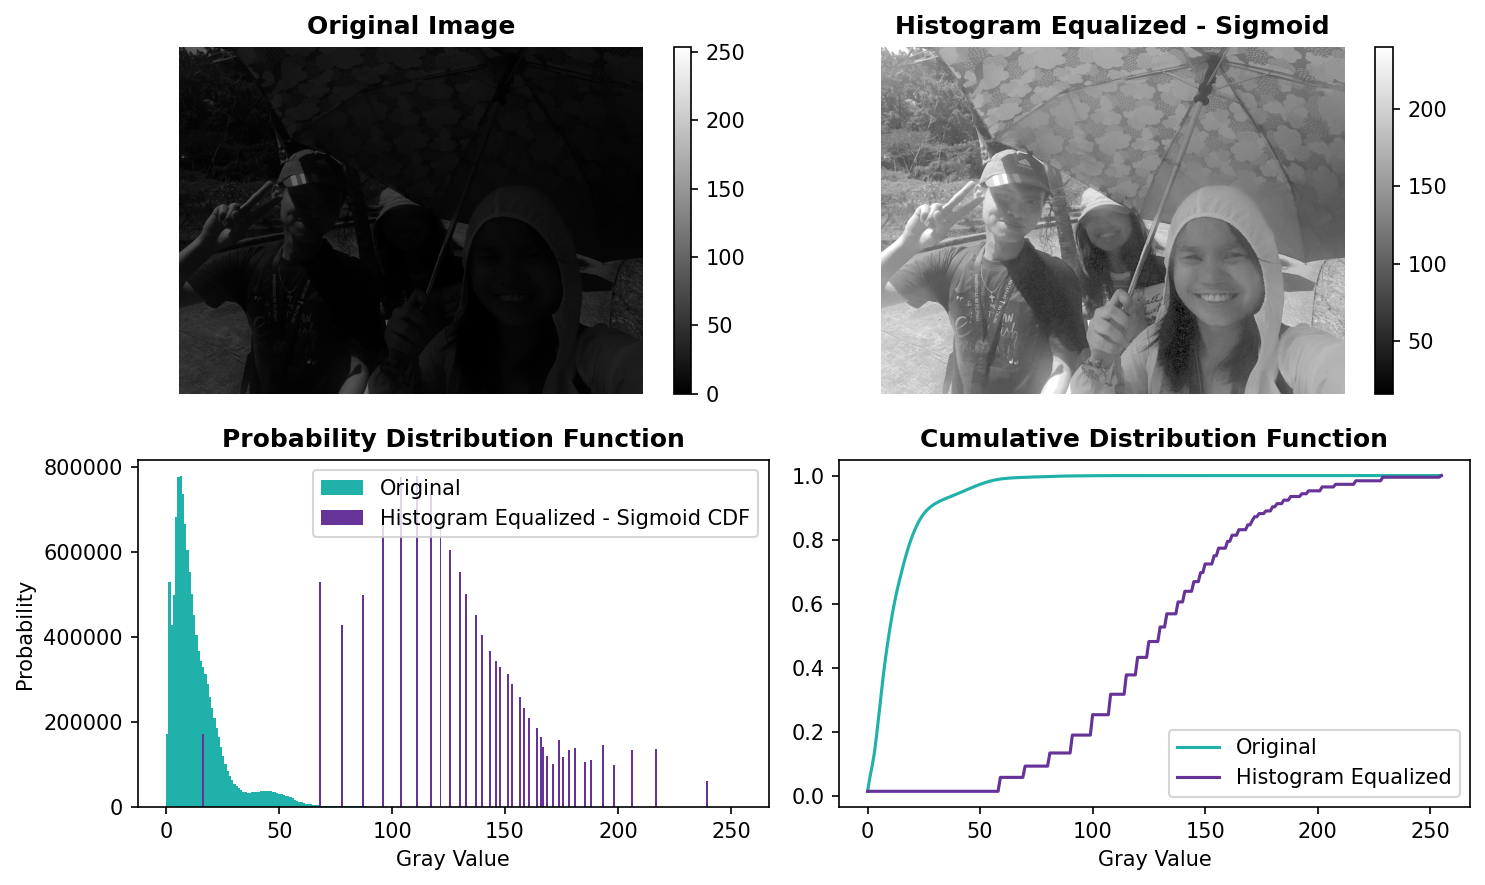

In [24]:
#Plotting
fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi=150)

orig = ax[0, 0].imshow(gray, cmap='gray')
ax[0, 0].set_title('Original Image', weight = 'bold')
ax[0,0].axis('off')
cs = ax[0,1].imshow(hbj_sig, cmap = 'gray')
ax[0,1].set_title('Histogram Equalized - Sigmoid', weight = 'bold')
ax[0,1].axis('off')
fig.colorbar(orig)
fig.colorbar(cs)

#Plot PDFs
ax[1, 0].hist(gray.flatten(), 256, color='lightseagreen', label = 'Original')
ax[1, 0].hist(hbj_sig.flatten(), 256, color='rebeccapurple', label = 'Histogram Equalized - Sigmoid CDF')
ax[1, 0].set_title('Probability Distribution Function', weight = 'bold')
ax[1, 0].set_xlabel("Gray Value")
ax[1, 0].set_ylabel("Probability")
ax[1, 0].legend()


#Compute histogram and CDF of histogram-manipulated image
hist_, bins_ = np.histogram(hbj_sig.flatten(), 256)
cdf_ = hist_.cumsum()
cdf_normalized_ = cdf_ / cdf_.max()

#Plot CDFs
ax[1, 1].plot(cdf_normalized, color = 'lightseagreen', label = 'Original')
ax[1, 1].plot(cdf_normalized_, color = 'rebeccapurple', label = 'Histogram Equalized')
ax[1, 1].set_title('Cumulative Distribution Function', weight = 'bold')
ax[1, 1].set_xlabel("Gray Value")
ax[1, 1].legend()

plt.tight_layout()
plt.show()

Histogram equalization with a sigmoid CDF applies a gradual and non-linear transformation to pixel values (as seen by the s-shape of the function). This approach preserves details in both low-contrast and high-contrast regions of the image

# **ADAPTIVE HISTOGRAM EQUALIZATION**

This method of histogram equalization differs from the normal histogram equalization in a way that it enhances the contrast locally. When it says, "locally", it means that it divides the image into different segments/blocks and then compute the histogram equalization for each.

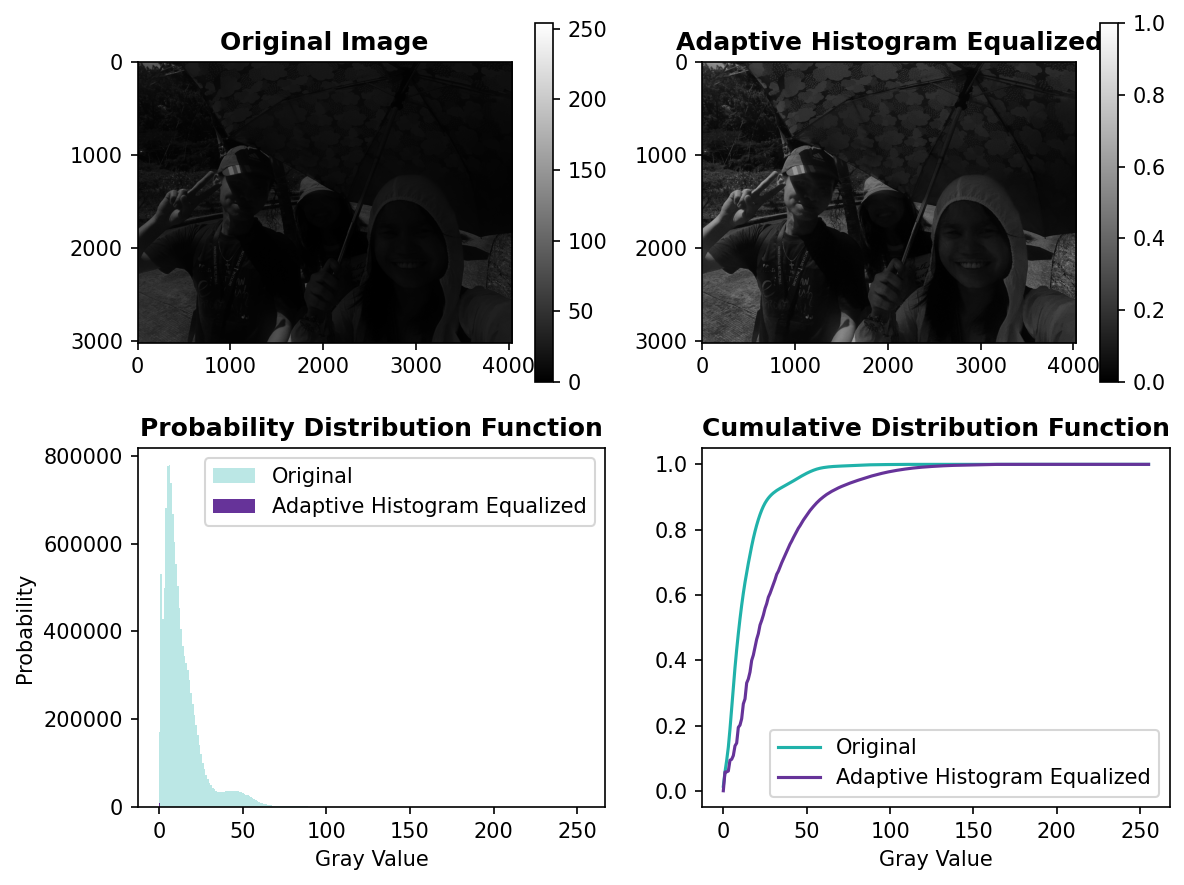

In [92]:
from skimage import exposure

#Adaptive histogram equalization using skimage
img_eq = exposure.equalize_adapthist(gray)

#Plotting
fig, ax = plt.subplots(2, 2, figsize=(8, 6), dpi=150)

orig = ax[0, 0].imshow(gray, cmap='gray')
ax[0, 0].set_title('Original Image', weight = 'bold')
cs = ax[0,1].imshow(img_eq, cmap = 'gray')
ax[0,1].set_title('Adaptive Histogram Equalized', weight = 'bold')
fig.colorbar(orig)
fig.colorbar(cs)

#Plot PDFs
ax[1, 0].hist(gray.flatten(), 256, color='lightseagreen', label = 'Original', alpha = 0.3)
ax[1, 0].hist(img_eq.flatten(), 256, color='rebeccapurple', label = 'Adaptive Histogram Equalized')
ax[1, 0].set_title('Probability Distribution Function', weight = 'bold')
ax[1, 0].set_xlabel("Gray Value")
ax[1, 0].set_ylabel("Probability")
ax[1, 0].legend()

#Compute histogram and CDF of original image
hist, bins = np.histogram(gray.flatten(), 256)
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

#Compute histogram and CDF of histogram-manipulated image
hist_, bins_ = np.histogram(img_eq.flatten(), 256)
cdf_ = hist_.cumsum()
cdf_normalized_ = cdf_ / cdf_.max()

#Plot CDFs
ax[1, 1].plot(cdf_normalized, color = 'lightseagreen', label = 'Original')
ax[1, 1].plot(cdf_normalized_, color = 'rebeccapurple', label = 'Adaptive Histogram Equalized')
ax[1, 1].set_title('Cumulative Distribution Function', weight = 'bold')
ax[1, 1].set_xlabel("Gray Value")
ax[1, 1].legend()

plt.tight_layout()
plt.show()

We can observe that the CDF of the adaptive histogram equalized image is much closer to that of the original image compared to the linear and sigmoid histogram equalization. This is because the division into segments presevres more of the original local contract charactertics, meaning that it adapts to  contrast variations in the specific segments.

**COMPARISON**

In summary, we can observe the differences in histogram equalization using linear, histogram equalization using sigmoid function, and using adaptive histogram equalization.

(-0.5, 4031.5, 3023.5, -0.5)

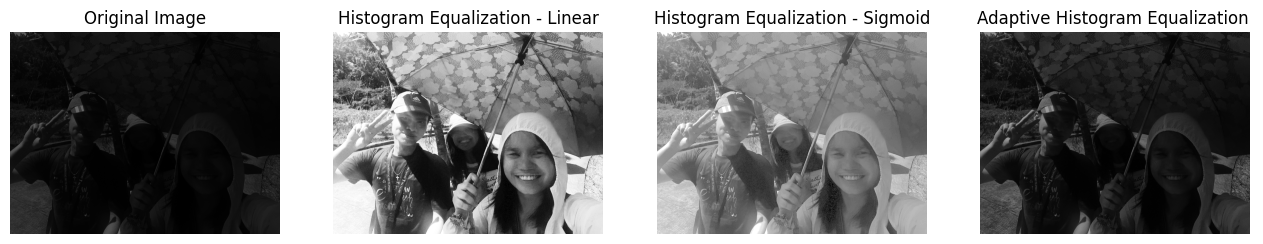

In [87]:
fig, ax = plt.subplots(1, 4, figsize = (16, 10))

ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(hbj_line, cmap='gray')
ax[1].set_title('Histogram Equalization - Linear')
ax[1].axis('off')
ax[2].imshow(hbj_sig, cmap='gray')
ax[2].set_title('Histogram Equalization - Sigmoid')
ax[2].axis('off')
ax[3].imshow(img_eq, cmap='gray')
ax[3].set_title('Adaptive Histogram Equalization ')
ax[3].axis('off')